In [1]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn import gaussian_process
from sklearn.gaussian_process import kernels

## Sample from GP prior

Consider the Gaussian process prior with squared exponential kernel

$$
f \sim \mathcal{GP}(m, \kappa), \qquad m(x) = 0 \text{ and } \kappa(x, x') = \sigma^2_f \exp{\Big(−\frac{1}{2l^2} {\|x - x'\|}^2\Big)}.
$$

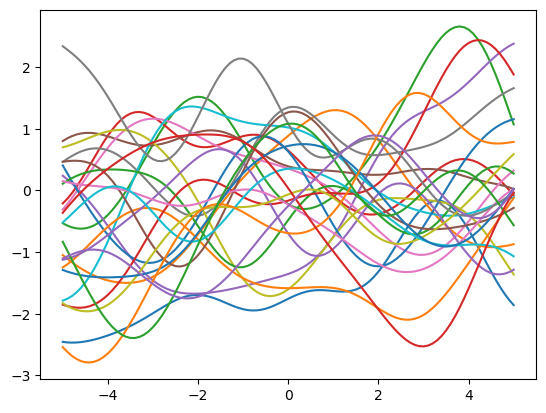

In [2]:
xs = np.linspace(-5,5,101)

sigma_f = 1
l2 = 2

mean = np.zeros(101) # Mean vector
cov = sigma_f * np.exp( (-1/(2*l2)) * np.abs(xs[:, None] - xs[None, :])**2 ) # Covariance matrix

samples = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=25) #D raw 25 samples

plt.plot(xs, samples.T)
plt.show()

### The effects of changing length and magnitude

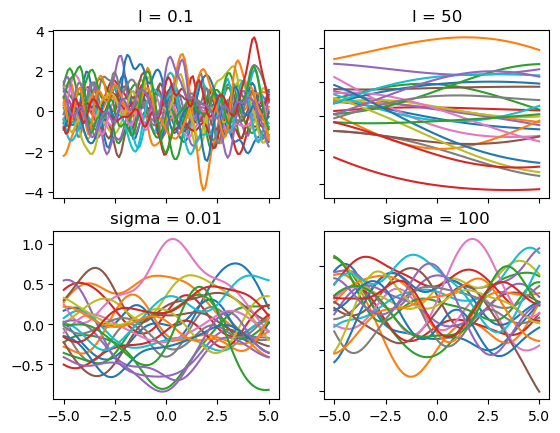

In [3]:
# l = 0.1
l2 = 0.1
cov = np.exp( (-1/(2*l2)) * np.abs(xs[:, None] - xs[None, :])**2 ) # Covariance matrix
samples2 = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=25) #D raw 25 samples

# l = 50
l2 = 50
cov = np.exp( (-1/(2*l2)) * np.abs(xs[:, None] - xs[None, :])**2 ) # Covariance matrix
samples3 = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=25) #D raw 25 samples

# sigma = 0.1
sigma_f = 0.1
l2 = 2
cov = sigma_f * np.exp( (-1/(2*l2)) * np.abs(xs[:, None] - xs[None, :])**2 ) # Covariance matrix
samples4 = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=25) #D raw 25 samples

# sigma = 10
sigma_f = 10
cov = sigma_f * np.exp( (-1/(2*l2)) * np.abs(xs[:, None] - xs[None, :])**2 ) # Covariance matrix
samples5 = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=25) #D raw 25 samples

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(xs, samples2.T)
axs[0, 0].set_title('l = 0.1')
axs[0, 1].plot(xs, samples3.T)
axs[0, 1].set_title('l = 50')
axs[1, 0].plot(xs, samples4.T)
axs[1, 0].set_title('sigma = 0.01')
axs[1, 1].plot(xs, samples5.T)
axs[1, 1].set_title('sigma = 100')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# GP regression

Use the training data $\mathbf{x}$, $\mathbf{y}$ and the matrices constructed in (b) to compute the posterior mean $\boldsymbol{\mu}_{\mathrm{posterior}}$ and the posterior covariance $\mathbf{K}_{\mathrm{posterior}}$ for $\mathbf{x}_∗$, by using the equations for conditional multivariate normal distribution.

$$
E[f_{1:s} \mid y_{1:n}] = m_{1:s}^* + C(x_{1:s}^*,x_{1:n}) \left( C(x_{1:n},x_{1:n}) + \Xi I_n) \right)^{-1}(y_{1:n} - m_{1:n}),
$$
$$
Cov[f_{1:s}^* \mid y_{1:n}] = C(x_{1:s}^*, x_{1:s}^*) - C(x_{1:s}^*, x_{1:n}) \left( C(x_{1:n}, x_{1:n} + \Xi I_n) \right)^{-1} C(x_{1:n},x_{1:s}^*).
$$

In [4]:
n = 5
x = np.array([-4,-3,-1,0,2])
y = np.array([-2,0,1,2,-1])

def k(xs, ys, l, sf2):
    return sf2 * np.exp( -1/(2 * l**2) * np.abs(xs[:,None] - ys[None, :])**2 )

l = np.sqrt(2)
sf2 = 1

m = 101
xs = np.linspace(-5, 5, m)

Kx = k(x, x, l, sf2)
Kxs = k(xs, xs, l, sf2)
Kxxs = k(x, xs, l, sf2)

A = np.linalg.solve(Kx, Kxxs)
mu_post = A.T@y
K_post = Kxs - Kxxs.T@A

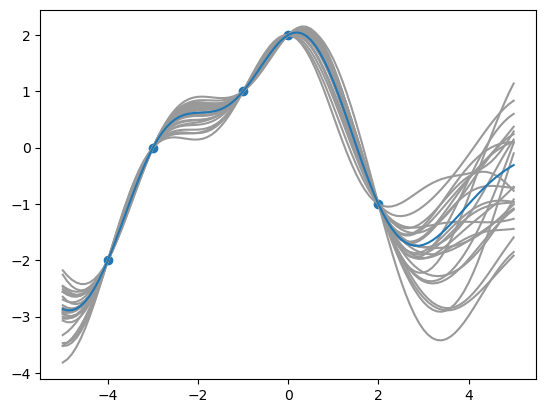

In [5]:
samples = stats.multivariate_normal.rvs(mu_post, K_post, 25)
plt.plot(xs, samples.T, color='0.6')
plt.plot(xs, mu_post)
plt.scatter(x,y)
plt.show()